In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')

# Data Field

- person_id: 유저별 고유 아이디
- Sex: 성별
- past_login_total: 과거(5월 8일 이전)에 로그인한 총 횟수
- past_1_month_login: 과거 1달간 로그인한 총 횟수
- past_1_week_login: 과거 1주간 로그인한 총 횟수
- sub_size: 과거(5월 8일 이전)에 데이콘 대회에서의 총 제출 수
- email_type: 가입한 이메일 종류
- phone_rat: 폰으로 접속한 비율
- apple_rat: 애플 기기로 접속한 비율
- login: 로그인 여부 

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
print(train.shape,test.shape)

(1500, 10) (682, 9)


In [4]:
train.isna().sum()

person_id               0
Sex                     0
past_login_total      160
past_1_month_login    160
past_1_week_login     160
sub_size                0
email_type              0
phone_rat               0
apple_rat               0
login                   0
dtype: int64

In [5]:
test.isna().sum()

person_id              0
Sex                    0
past_login_total      67
past_1_month_login    67
past_1_week_login     67
sub_size               0
email_type             0
phone_rat              0
apple_rat              0
dtype: int64

In [6]:
train.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login
0,1015,male,1.0,0.0,0.0,0.0,naver,0.0,1.0,0
1,1940,female,2.0,0.0,0.0,0.0,other,1.0,1.0,0
2,1356,male,1.0,0.0,0.0,0.0,other,1.0,0.0,0
3,1535,male,2.0,0.0,0.0,0.0,other,0.0,1.0,0
4,216,female,NaN,NaN,NaN,0.0,naver,0.0,0.0,0


In [7]:
test.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat
0,560,female,17.0,0.0,0.0,0.0,gmail,0.0,0.0
1,2092,female,2.0,0.0,0.0,0.0,other,0.0,0.0
2,1554,male,1.0,0.0,0.0,0.0,naver,0.0,0.0
3,1345,female,NaN,NaN,NaN,0.0,other,1.0,0.0
4,1036,female,13.0,0.0,0.0,0.0,nate,0.0,0.0


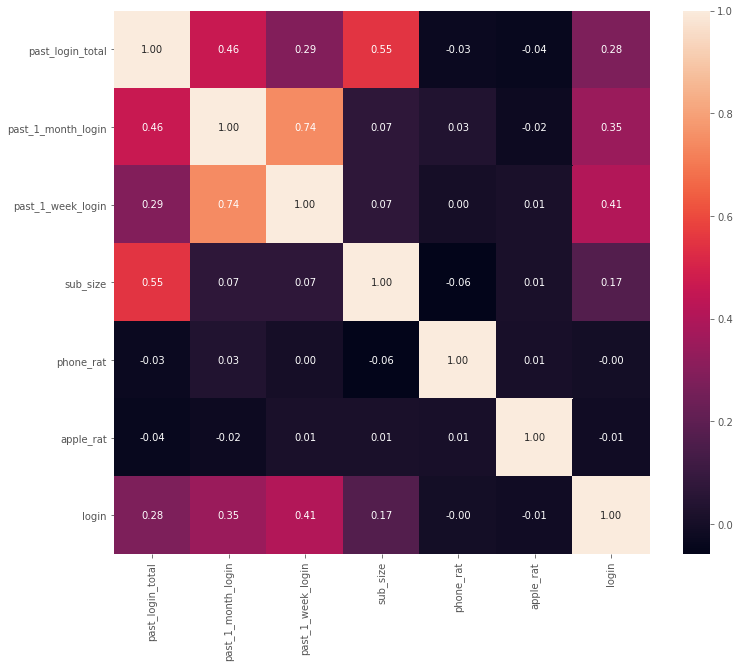

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(data=train.drop('person_id',axis=1).corr(),annot=True,fmt='.2f')

In [9]:
train.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login
0,1015,male,1.0,0.0,0.0,0.0,naver,0.0,1.0,0
1,1940,female,2.0,0.0,0.0,0.0,other,1.0,1.0,0
2,1356,male,1.0,0.0,0.0,0.0,other,1.0,0.0,0
3,1535,male,2.0,0.0,0.0,0.0,other,0.0,1.0,0
4,216,female,NaN,NaN,NaN,0.0,naver,0.0,0.0,0


In [426]:
from sklearn.preprocessing import minmax_scale, scale

In [457]:
# l1=[]
# for i,j in enumerate(train.drop('person_id',axis=1).duplicated()):
#     if j==False:
#         l1.append(i)

In [459]:
# train_du=train.iloc[l1,:]

In [466]:
# l1=[]
# for i,j in enumerate(test.drop(['person_id','log'],axis=1).duplicated()):
#     if j==True:
#         l1.append(i)

In [10]:
# test.iloc[l1,:]

# EDA & Feature Engineering

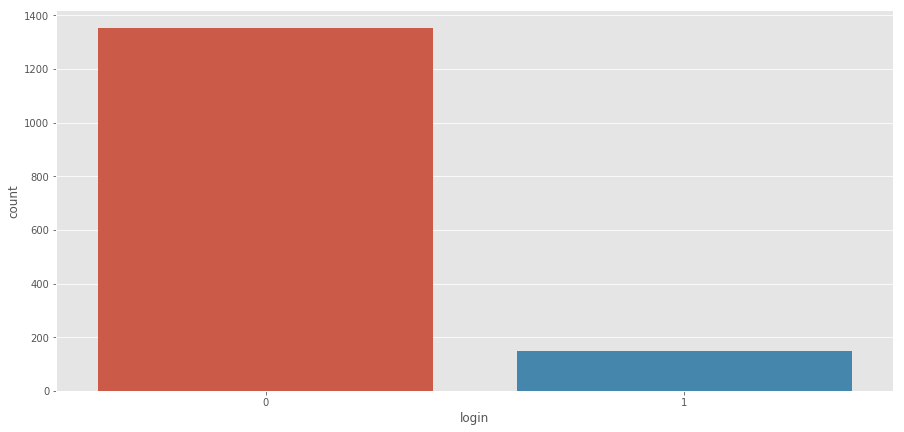

In [11]:
plt.figure(figsize=(15,7))
sns.countplot(train['login'])

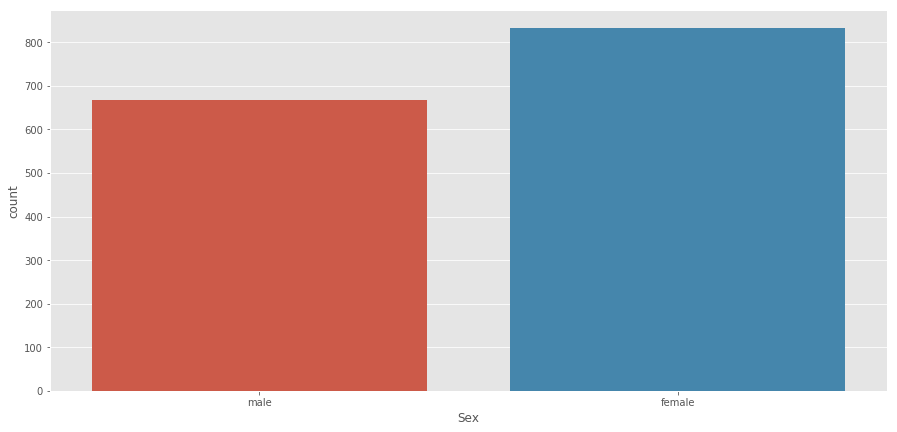

In [12]:
plt.figure(figsize=(15,7))
sns.countplot(train['Sex'])

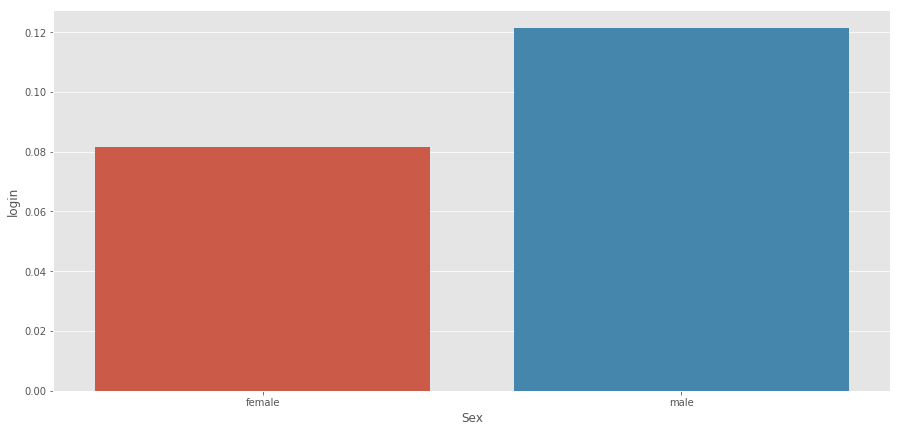

In [13]:
plt.figure(figsize=(15,7))
sns.barplot(x=train.groupby('Sex')['login'].mean().index,y=train.groupby('Sex')['login'].mean())
# 남자가 조금 더 높음

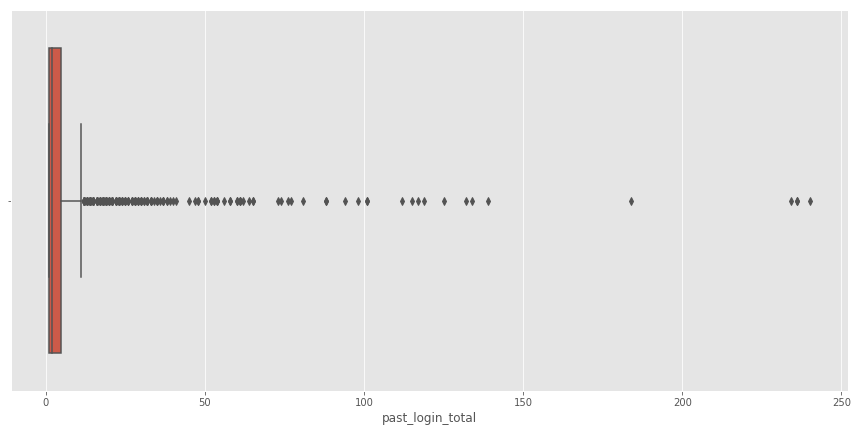

In [14]:
plt.figure(figsize=(15,7))
sns.boxplot(train['past_login_total'])

In [15]:
train[train['past_login_total']==0]

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login


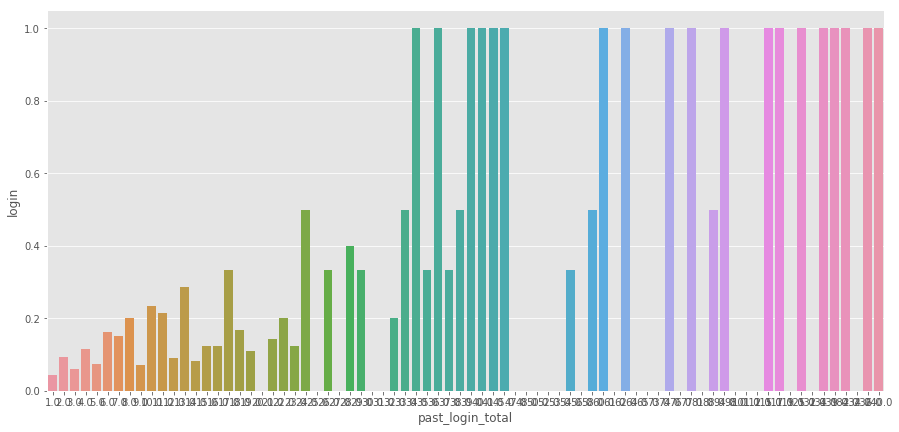

In [16]:
plt.figure(figsize=(15,7))
sns.barplot(x=train.groupby('past_login_total')['login'].mean().index,y=train.groupby('past_login_total')['login'].mean())

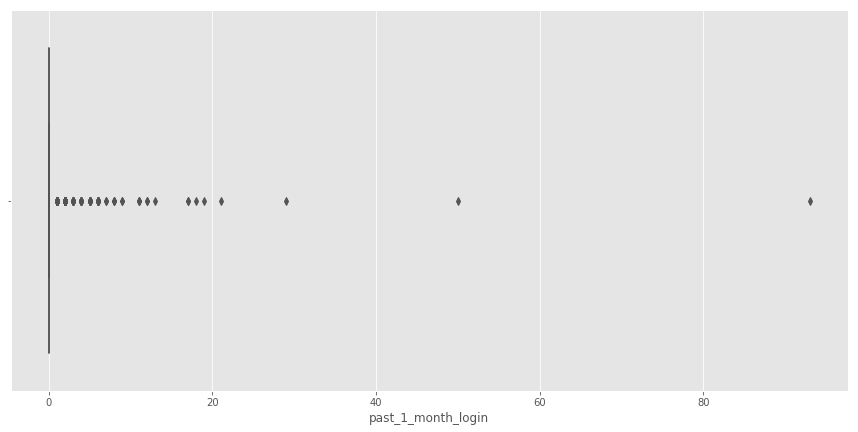

In [17]:
plt.figure(figsize=(15,7))
sns.boxplot(train['past_1_month_login'])

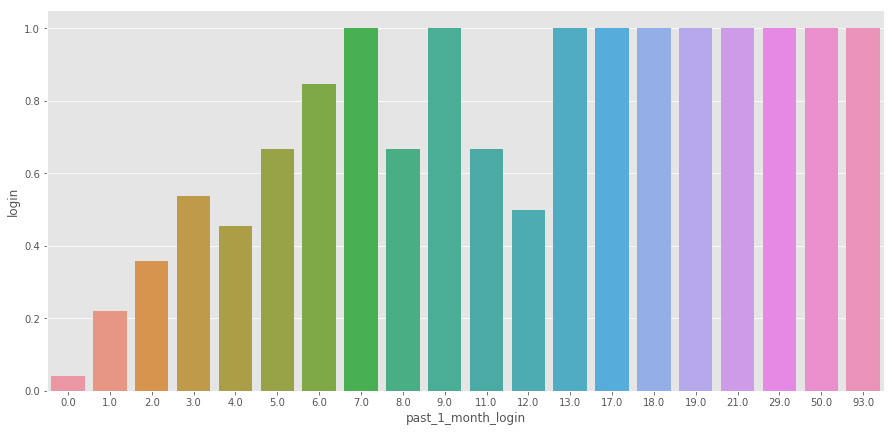

In [18]:
plt.figure(figsize=(15,7))
sns.barplot(x=train.groupby('past_1_month_login')['login'].mean().index,y=train.groupby('past_1_month_login')['login'].mean())

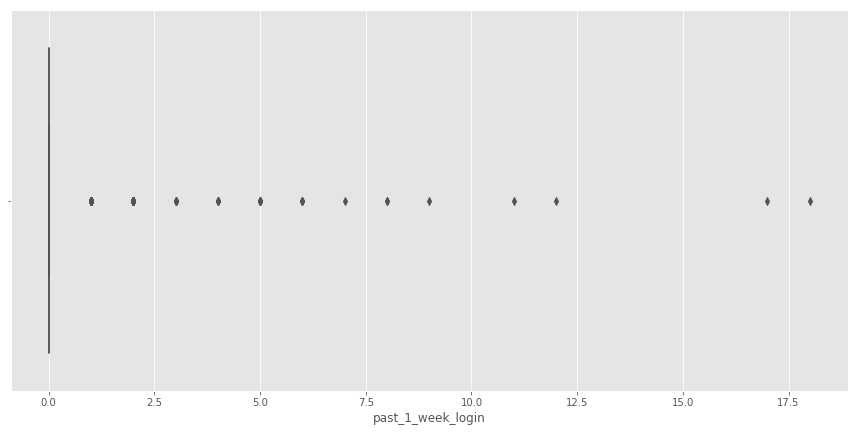

In [19]:
plt.figure(figsize=(15,7))
sns.boxplot(train['past_1_week_login'])

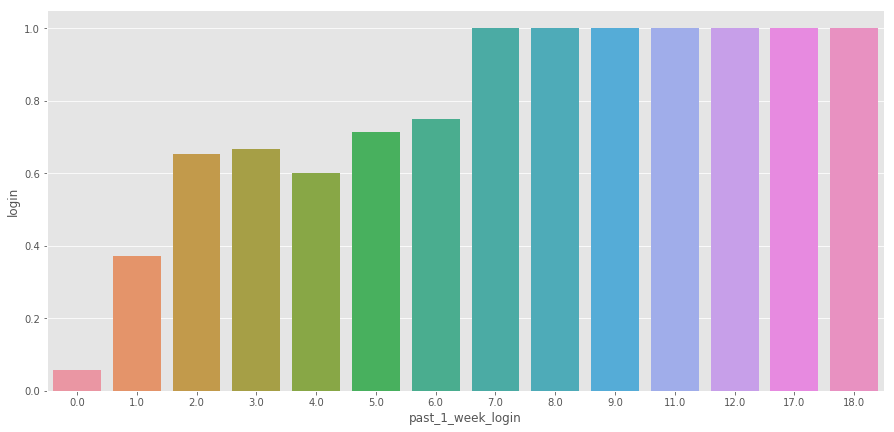

In [20]:
plt.figure(figsize=(15,7))
sns.barplot(x=train.groupby('past_1_week_login')['login'].mean().index,y=train.groupby('past_1_week_login')['login'].mean())

In [21]:
train[train['past_login_total'].isna()]['login'].mean()

0.1

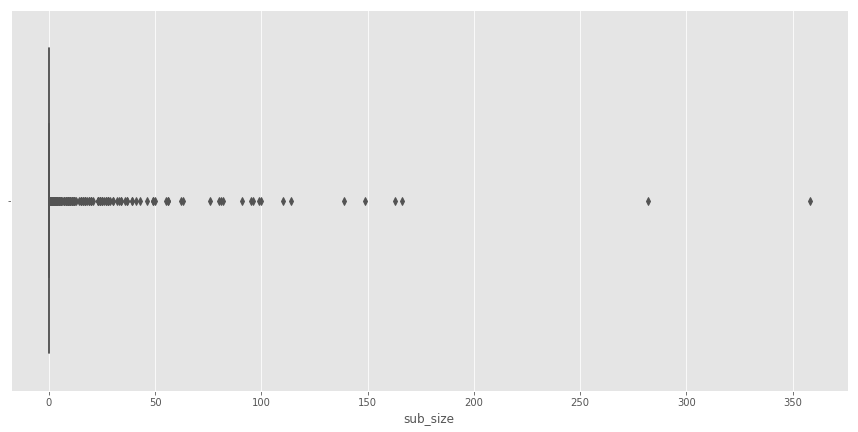

In [22]:
plt.figure(figsize=(15,7))
sns.boxplot(train['sub_size'])

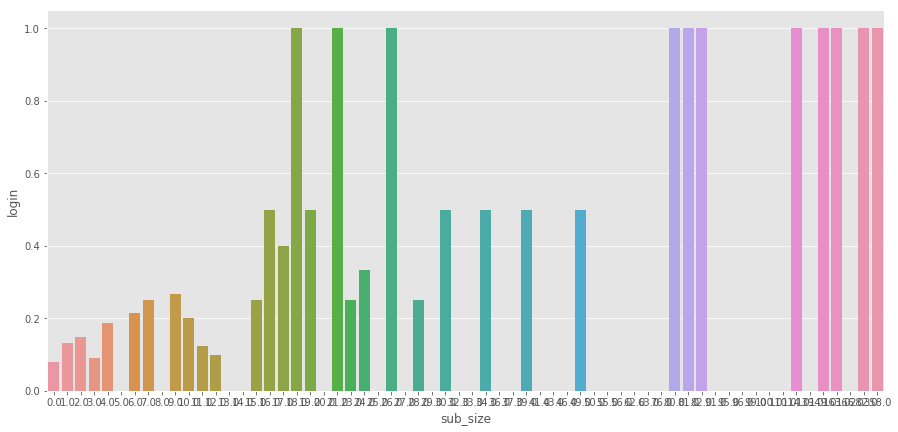

In [23]:
plt.figure(figsize=(15,7))
sns.barplot(x=train.groupby('sub_size')['login'].mean().index,y=train.groupby('sub_size')['login'].mean())

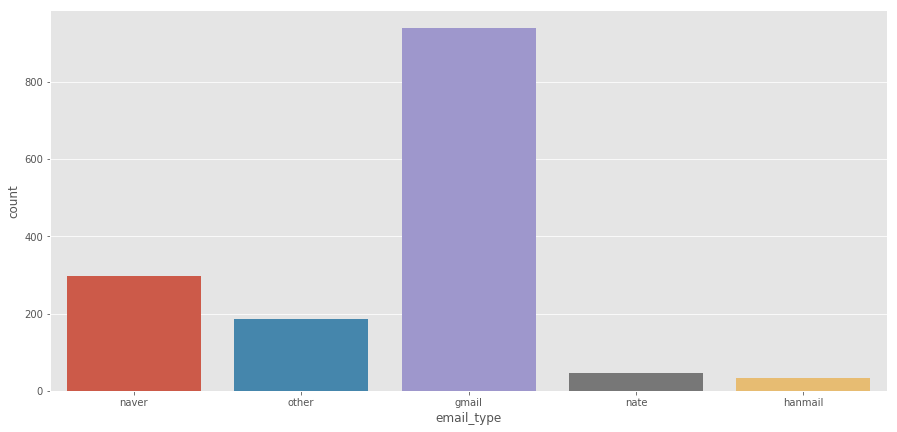

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(train['email_type'])

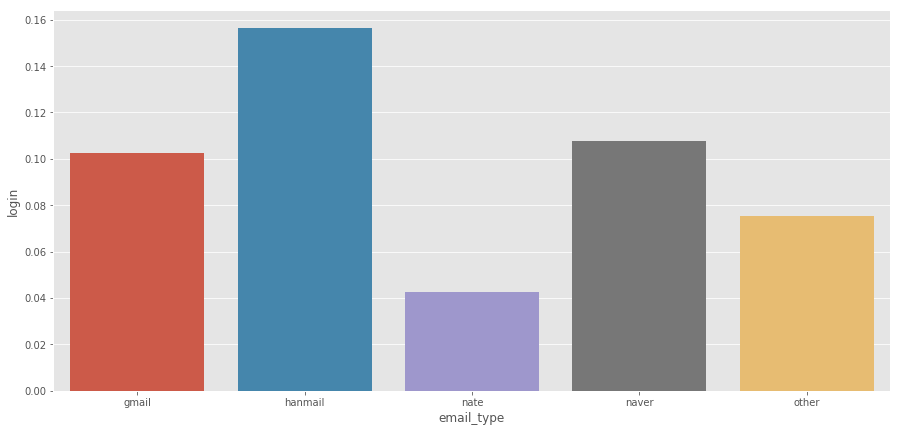

In [25]:
plt.figure(figsize=(15,7))
sns.barplot(x=train.groupby('email_type')['login'].mean().index,y=train.groupby('email_type')['login'].mean())

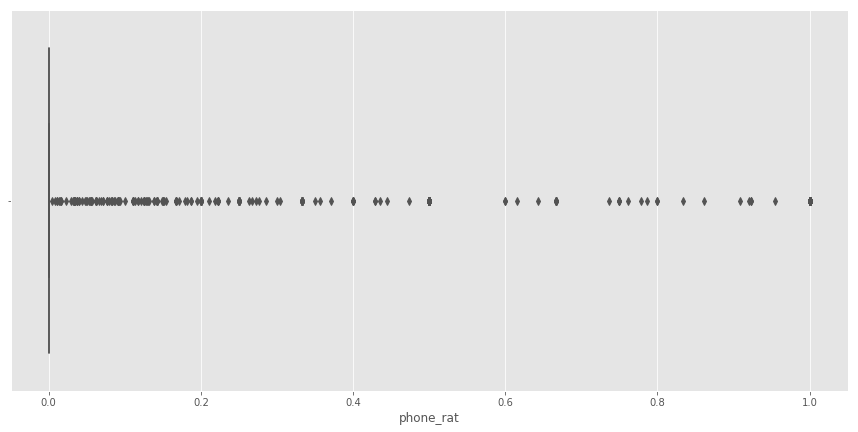

In [26]:
plt.figure(figsize=(15,7))
sns.boxplot(train['phone_rat'])

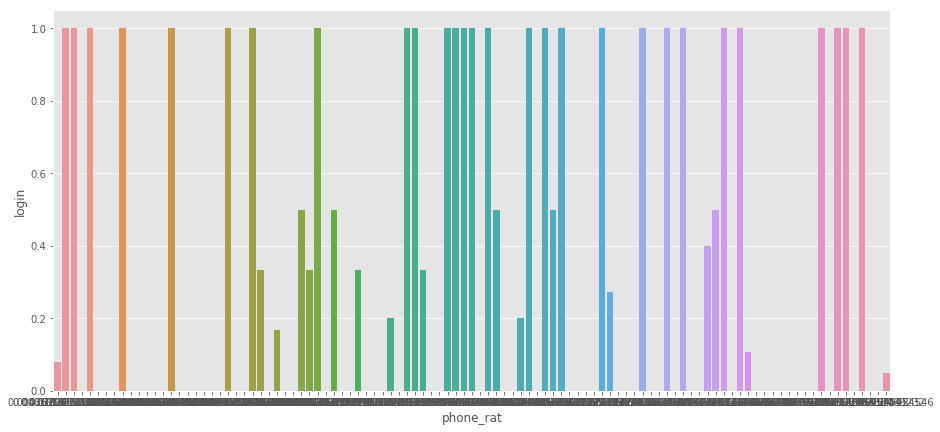

In [27]:
plt.figure(figsize=(15,7))
sns.barplot(x=train.groupby('phone_rat')['login'].mean().index,y=train.groupby('phone_rat')['login'].mean())
# ?

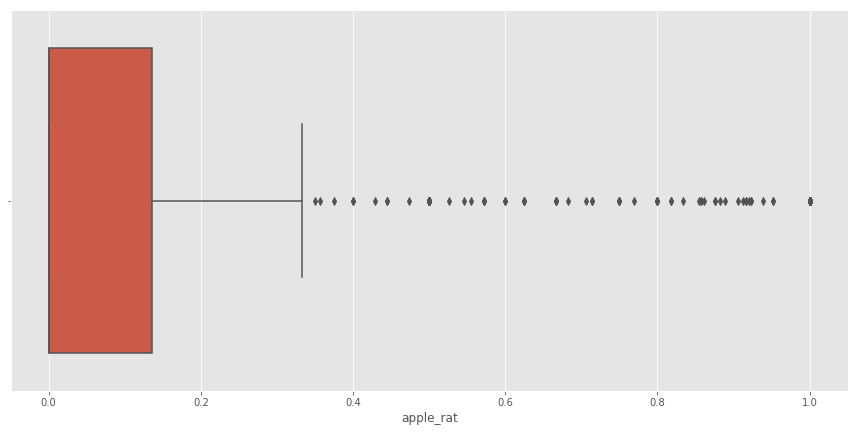

In [28]:
plt.figure(figsize=(15,7))
sns.boxplot(train['apple_rat'])

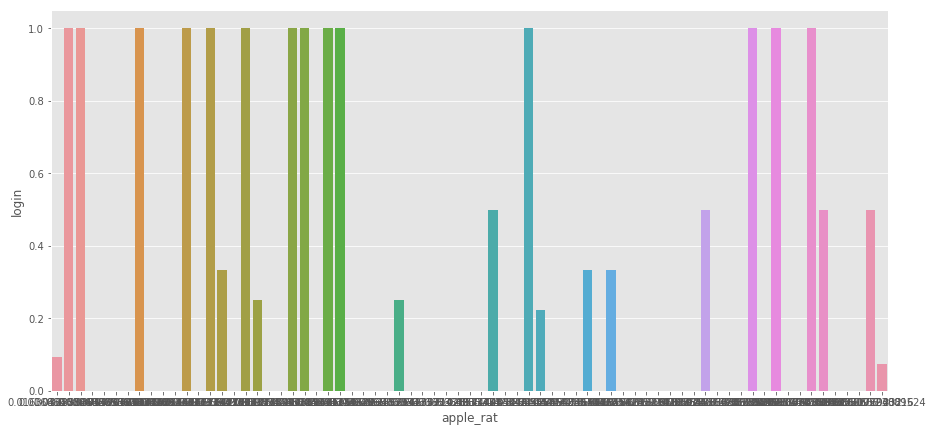

In [29]:
plt.figure(figsize=(15,7))
sns.barplot(x=train.groupby('apple_rat')['login'].mean().index,y=train.groupby('apple_rat')['login'].mean())

In [30]:
train.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login
0,1015,male,1.0,0.0,0.0,0.0,naver,0.0,1.0,0
1,1940,female,2.0,0.0,0.0,0.0,other,1.0,1.0,0
2,1356,male,1.0,0.0,0.0,0.0,other,1.0,0.0,0
3,1535,male,2.0,0.0,0.0,0.0,other,0.0,1.0,0
4,216,female,NaN,NaN,NaN,0.0,naver,0.0,0.0,0


In [31]:
train[train['past_login_total']<train['past_1_month_login']]

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login


In [32]:
train[train['past_login_total']<train['past_1_week_login']]

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login


In [33]:
train[train['past_1_month_login']<train['past_1_week_login']]

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login


In [34]:
train[train['past_login_total']==train['past_1_month_login']]
# 신생

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login
59,276,female,1.0,1.0,0.0,0.0,gmail,0.000000,0.0,0
76,275,male,1.0,1.0,0.0,0.0,gmail,0.000000,0.0,0
82,68,female,5.0,5.0,3.0,0.0,gmail,0.400000,0.0,1
83,98,female,4.0,4.0,3.0,0.0,gmail,0.000000,1.0,1
84,148,female,1.0,1.0,1.0,0.0,gmail,0.000000,1.0,0
86,7,male,2.0,2.0,1.0,0.0,gmail,0.000000,1.0,1
95,308,female,1.0,1.0,0.0,0.0,gmail,0.000000,0.0,0
121,290,male,1.0,1.0,0.0,0.0,hanmail,0.000000,0.0,0
136,123,female,2.0,2.0,1.0,0.0,gmail,0.000000,0.0,0
144,55,female,1.0,1.0,1.0,0.0,gmail,0.000000,0.0,0


In [35]:
train[train['past_login_total']==train['past_1_week_login']]
# 완전 신생

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login
84,148,female,1.0,1.0,1.0,0.0,gmail,0.00,1.00,0
144,55,female,1.0,1.0,1.0,0.0,gmail,0.00,0.00,0
162,54,male,4.0,4.0,4.0,0.0,naver,0.00,0.00,0
179,36,female,1.0,1.0,1.0,0.0,gmail,0.00,0.00,1
204,140,female,1.0,1.0,1.0,0.0,gmail,0.00,0.00,0
266,40,female,5.0,5.0,5.0,1.0,gmail,0.20,0.00,0
270,141,male,4.0,4.0,4.0,0.0,gmail,0.00,0.00,1
349,103,male,1.0,1.0,1.0,0.0,naver,1.00,0.00,0
351,38,male,1.0,1.0,1.0,0.0,gmail,0.00,1.00,0
365,61,female,2.0,2.0,2.0,0.0,gmail,0.00,0.00,0


In [36]:
train['past_login_total']-train['past_1_month_login']
# 1달 전까지의 로그인

0         1.0
1         2.0
2         1.0
3         2.0
4         NaN
5         4.0
6         NaN
7        48.0
8         2.0
9         5.0
10        2.0
11        1.0
12        1.0
13        NaN
14       14.0
15        1.0
16        1.0
17        2.0
18        2.0
19        3.0
20        8.0
21        9.0
22      234.0
23        9.0
24       12.0
25        4.0
26       58.0
27        2.0
28        7.0
29        1.0
        ...  
1470     20.0
1471      9.0
1472      5.0
1473      1.0
1474     21.0
1475      1.0
1476     29.0
1477      2.0
1478     11.0
1479      5.0
1480      6.0
1481      4.0
1482      0.0
1483      7.0
1484      0.0
1485      1.0
1486      8.0
1487      1.0
1488      NaN
1489      2.0
1490      9.0
1491      5.0
1492      1.0
1493      1.0
1494      5.0
1495      1.0
1496      0.0
1497      NaN
1498      0.0
1499      1.0
Length: 1500, dtype: float64

In [38]:
train['past_1_month_login']-train['past_1_week_login']
# 한달 전 ~ 1주 전 (3주간) 로그인

0       0.0
1       0.0
2       0.0
3       0.0
4       NaN
5       0.0
6       NaN
7       0.0
8       0.0
9       0.0
10      0.0
11      1.0
12      0.0
13      NaN
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
1470    0.0
1471    0.0
1472    0.0
1473    0.0
1474    0.0
1475    0.0
1476    0.0
1477    0.0
1478    0.0
1479    0.0
1480    0.0
1481    0.0
1482    0.0
1483    0.0
1484    0.0
1485    0.0
1486    0.0
1487    0.0
1488    NaN
1489    0.0
1490    0.0
1491    0.0
1492    0.0
1493    0.0
1494    0.0
1495    0.0
1496    0.0
1497    NaN
1498    0.0
1499    0.0
Length: 1500, dtype: float64

In [39]:
com=[train,test]
for i in com:
    i['newb']=0
    i['newb'].iloc[i[i['past_login_total']==i['past_1_month_login']].index]=1
train.head(5)

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login,newb
0,1015,male,1.0,0.0,0.0,0.0,naver,0.0,1.0,0,0
1,1940,female,2.0,0.0,0.0,0.0,other,1.0,1.0,0,0
2,1356,male,1.0,0.0,0.0,0.0,other,1.0,0.0,0,0
3,1535,male,2.0,0.0,0.0,0.0,other,0.0,1.0,0,0
4,216,female,NaN,NaN,NaN,0.0,naver,0.0,0.0,0,0


In [40]:
train[train['newb']==1].shape

(110, 11)

In [41]:
com=[train,test]
for i in com:
    i['real_newb']=0
    i['real_newb'].iloc[i[i['past_login_total']==i['past_1_week_login']].index]=1
train.head(5)

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login,newb,real_newb
0,1015,male,1.0,0.0,0.0,0.0,naver,0.0,1.0,0,0,0
1,1940,female,2.0,0.0,0.0,0.0,other,1.0,1.0,0,0,0
2,1356,male,1.0,0.0,0.0,0.0,other,1.0,0.0,0,0,0
3,1535,male,2.0,0.0,0.0,0.0,other,0.0,1.0,0,0,0
4,216,female,NaN,NaN,NaN,0.0,naver,0.0,0.0,0,0,0


In [42]:
train[train['real_newb']==1].shape

(57, 12)

In [43]:
com=[train,test]
for i in com:
    i['1_month_ago']=i['past_login_total']-i['past_1_month_login']
train.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login,newb,real_newb,1_month_ago
0,1015,male,1.0,0.0,0.0,0.0,naver,0.0,1.0,0,0,0,1.0
1,1940,female,2.0,0.0,0.0,0.0,other,1.0,1.0,0,0,0,2.0
2,1356,male,1.0,0.0,0.0,0.0,other,1.0,0.0,0,0,0,1.0
3,1535,male,2.0,0.0,0.0,0.0,other,0.0,1.0,0,0,0,2.0
4,216,female,NaN,NaN,NaN,0.0,naver,0.0,0.0,0,0,0,NaN


In [44]:
com=[train,test]
for i in com:
    i['1_week_ago']=i['past_1_month_login']-i['past_1_week_login']
train.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login,newb,real_newb,1_month_ago,1_week_ago
0,1015,male,1.0,0.0,0.0,0.0,naver,0.0,1.0,0,0,0,1.0,0.0
1,1940,female,2.0,0.0,0.0,0.0,other,1.0,1.0,0,0,0,2.0,0.0
2,1356,male,1.0,0.0,0.0,0.0,other,1.0,0.0,0,0,0,1.0,0.0
3,1535,male,2.0,0.0,0.0,0.0,other,0.0,1.0,0,0,0,2.0,0.0
4,216,female,NaN,NaN,NaN,0.0,naver,0.0,0.0,0,0,0,NaN,NaN


In [45]:
com=[train,test]
for i in com:
    i['Sex']=i['Sex'].map({'male':0,'female':1})
train.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login,newb,real_newb,1_month_ago,1_week_ago
0,1015,0,1.0,0.0,0.0,0.0,naver,0.0,1.0,0,0,0,1.0,0.0
1,1940,1,2.0,0.0,0.0,0.0,other,1.0,1.0,0,0,0,2.0,0.0
2,1356,0,1.0,0.0,0.0,0.0,other,1.0,0.0,0,0,0,1.0,0.0
3,1535,0,2.0,0.0,0.0,0.0,other,0.0,1.0,0,0,0,2.0,0.0
4,216,1,NaN,NaN,NaN,0.0,naver,0.0,0.0,0,0,0,NaN,NaN


In [46]:
ed1=pd.get_dummies(train['email_type'])
ed2=pd.get_dummies(test['email_type'])
ed1.head()

,gmail,hanmail,nate,naver,other
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,1,0


In [47]:
ed2.head()

,gmail,hanmail,nate,naver,other
0,1,0,0,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,1,0,0


In [48]:
train=train.join(ed1)
test=test.join(ed2)
train.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,login,newb,real_newb,1_month_ago,1_week_ago,gmail,hanmail,nate,naver,other
0,1015,0,1.0,0.0,0.0,0.0,naver,0.0,1.0,0,0,0,1.0,0.0,0,0,0,1,0
1,1940,1,2.0,0.0,0.0,0.0,other,1.0,1.0,0,0,0,2.0,0.0,0,0,0,0,1
2,1356,0,1.0,0.0,0.0,0.0,other,1.0,0.0,0,0,0,1.0,0.0,0,0,0,0,1
3,1535,0,2.0,0.0,0.0,0.0,other,0.0,1.0,0,0,0,2.0,0.0,0,0,0,0,1
4,216,1,NaN,NaN,NaN,0.0,naver,0.0,0.0,0,0,0,NaN,NaN,0,0,0,1,0


In [49]:
test.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,email_type,phone_rat,apple_rat,newb,real_newb,1_month_ago,1_week_ago,gmail,hanmail,nate,naver,other
0,560,1,17.0,0.0,0.0,0.0,gmail,0.0,0.0,0,0,17.0,0.0,1,0,0,0,0
1,2092,1,2.0,0.0,0.0,0.0,other,0.0,0.0,0,0,2.0,0.0,0,0,0,0,1
2,1554,0,1.0,0.0,0.0,0.0,naver,0.0,0.0,0,0,1.0,0.0,0,0,0,1,0
3,1345,1,NaN,NaN,NaN,0.0,other,1.0,0.0,0,0,NaN,NaN,0,0,0,0,1
4,1036,1,13.0,0.0,0.0,0.0,nate,0.0,0.0,0,0,13.0,0.0,0,0,1,0,0


In [50]:
com=[train,test]
for i in com:
    i.drop('email_type',axis=1,inplace=True)
train.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,phone_rat,apple_rat,login,newb,real_newb,1_month_ago,1_week_ago,gmail,hanmail,nate,naver,other
0,1015,0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1.0,0.0,0,0,0,1,0
1,1940,1,2.0,0.0,0.0,0.0,1.0,1.0,0,0,0,2.0,0.0,0,0,0,0,1
2,1356,0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1.0,0.0,0,0,0,0,1
3,1535,0,2.0,0.0,0.0,0.0,0.0,1.0,0,0,0,2.0,0.0,0,0,0,0,1
4,216,1,NaN,NaN,NaN,0.0,0.0,0.0,0,0,0,NaN,NaN,0,0,0,1,0


In [51]:
train=train.fillna(0)
train.isna().sum()

person_id             0
Sex                   0
past_login_total      0
past_1_month_login    0
past_1_week_login     0
sub_size              0
phone_rat             0
apple_rat             0
login                 0
newb                  0
real_newb             0
1_month_ago           0
1_week_ago            0
gmail                 0
hanmail               0
nate                  0
naver                 0
other                 0
dtype: int64

In [52]:
train.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,phone_rat,apple_rat,login,newb,real_newb,1_month_ago,1_week_ago,gmail,hanmail,nate,naver,other
0,1015,0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1.0,0.0,0,0,0,1,0
1,1940,1,2.0,0.0,0.0,0.0,1.0,1.0,0,0,0,2.0,0.0,0,0,0,0,1
2,1356,0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1.0,0.0,0,0,0,0,1
3,1535,0,2.0,0.0,0.0,0.0,0.0,1.0,0,0,0,2.0,0.0,0,0,0,0,1
4,216,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,1,0


In [53]:
test=test.fillna(0)
test.isna().sum()

person_id             0
Sex                   0
past_login_total      0
past_1_month_login    0
past_1_week_login     0
sub_size              0
phone_rat             0
apple_rat             0
newb                  0
real_newb             0
1_month_ago           0
1_week_ago            0
gmail                 0
hanmail               0
nate                  0
naver                 0
other                 0
dtype: int64

In [54]:
test.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,phone_rat,apple_rat,newb,real_newb,1_month_ago,1_week_ago,gmail,hanmail,nate,naver,other
0,560,1,17.0,0.0,0.0,0.0,0.0,0.0,0,0,17.0,0.0,1,0,0,0,0
1,2092,1,2.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,0.0,0,0,0,0,1
2,1554,0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0,0,0,0,1,0
3,1345,1,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0.0,0,0,0,0,1
4,1036,1,13.0,0.0,0.0,0.0,0.0,0.0,0,0,13.0,0.0,0,0,1,0,0


In [55]:
train[train['phone_rat']+train['apple_rat']>1]

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,phone_rat,apple_rat,login,newb,real_newb,1_month_ago,1_week_ago,gmail,hanmail,nate,naver,other
1,1940,1,2.0,0.0,0.0,0.0,1.000000,1.000000,0,0,0,2.0,0.0,0,0,0,0,1
115,1960,0,1.0,0.0,0.0,0.0,1.000000,1.000000,0,0,0,1.0,0.0,1,0,0,0,0
210,252,1,94.0,18.0,0.0,1.0,0.861702,0.861702,1,0,0,76.0,18.0,1,0,0,0,0
212,2115,0,1.0,0.0,0.0,0.0,1.000000,1.000000,0,0,0,1.0,0.0,1,0,0,0,0
223,1414,1,35.0,0.0,0.0,76.0,0.085714,1.000000,0,0,0,35.0,0.0,0,0,0,0,1
239,1522,0,1.0,0.0,0.0,0.0,1.000000,1.000000,0,0,0,1.0,0.0,0,0,0,1,0
263,79,0,17.0,9.0,9.0,0.0,0.235294,0.882353,1,0,0,8.0,0.0,1,0,0,0,0
268,3,0,13.0,13.0,11.0,7.0,0.076923,1.000000,1,1,0,0.0,2.0,1,0,0,0,0
279,1433,1,2.0,0.0,0.0,0.0,1.000000,1.000000,0,0,0,2.0,0.0,1,0,0,0,0
312,1753,1,10.0,0.0,0.0,0.0,0.200000,1.000000,0,0,0,10.0,0.0,1,0,0,0,0


In [56]:
train[train['apple_rat']==0].shape

(1097, 18)

In [57]:
com=[train,test]
for i in com:
    i['is_phone']=np.where(i['phone_rat']!=0,1,0)
    i['is_apple']=np.where(i['apple_rat']!=0,1,0)
train.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,phone_rat,apple_rat,login,newb,real_newb,1_month_ago,1_week_ago,gmail,hanmail,nate,naver,other,is_phone,is_apple
0,1015,0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1.0,0.0,0,0,0,1,0,0,1
1,1940,1,2.0,0.0,0.0,0.0,1.0,1.0,0,0,0,2.0,0.0,0,0,0,0,1,1,1
2,1356,0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1.0,0.0,0,0,0,0,1,1,0
3,1535,0,2.0,0.0,0.0,0.0,0.0,1.0,0,0,0,2.0,0.0,0,0,0,0,1,0,1
4,216,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,1,0,0,0


In [58]:
train[(train['phone_rat']==1)&(train['apple_rat']==0)].shape

(95, 20)

In [59]:
com=[train,test]
for i in com:
    i['only_desktop']=np.where((i['phone_rat']==0)&(i['apple_rat']==0),1,0)
    i['android']=np.where((i['phone_rat']==1)&(i['apple_rat']==0),1,0)
    i['iphone']=np.where((i['phone_rat']==1)&(i['apple_rat']==1),1,0)
train.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,phone_rat,apple_rat,login,newb,...,gmail,hanmail,nate,naver,other,is_phone,is_apple,only_desktop,android,iphone
0,1015,0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1940,1,2.0,0.0,0.0,0.0,1.0,1.0,0,0,...,0,0,0,0,1,1,1,0,0,1
2,1356,0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,1535,0,2.0,0.0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,216,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [60]:
com=[train,test]
for i in com:
    i['desktop_rat']=1-i['phone_rat']
train.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,phone_rat,apple_rat,login,newb,...,hanmail,nate,naver,other,is_phone,is_apple,only_desktop,android,iphone,desktop_rat
0,1015,0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,...,0,0,1,0,0,1,0,0,0,1.0
1,1940,1,2.0,0.0,0.0,0.0,1.0,1.0,0,0,...,0,0,0,1,1,1,0,0,1,0.0
2,1356,0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,...,0,0,0,1,1,0,0,1,0,0.0
3,1535,0,2.0,0.0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,1,0,1,0,0,0,1.0
4,216,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,1,0,0,1.0


In [61]:
train.head()

,person_id,Sex,past_login_total,past_1_month_login,past_1_week_login,sub_size,phone_rat,apple_rat,login,newb,...,hanmail,nate,naver,other,is_phone,is_apple,only_desktop,android,iphone,desktop_rat
0,1015,0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,...,0,0,1,0,0,1,0,0,0,1.0
1,1940,1,2.0,0.0,0.0,0.0,1.0,1.0,0,0,...,0,0,0,1,1,1,0,0,1,0.0
2,1356,0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,...,0,0,0,1,1,0,0,1,0,0.0
3,1535,0,2.0,0.0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,1,0,1,0,0,0,1.0
4,216,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,1,0,0,1.0


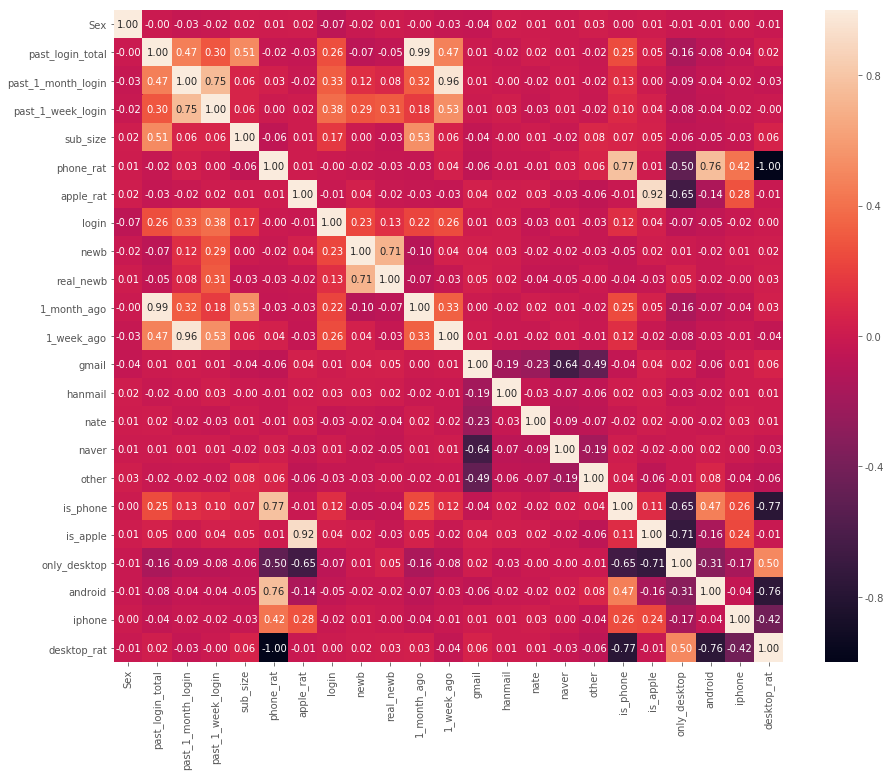

In [62]:
plt.figure(figsize=(15,12))
sns.heatmap(data=train.drop('person_id',axis=1).corr(),annot=True,fmt='.2f')

# Modeling

In [63]:
input_var=['Sex','past_login_total','past_1_month_login','past_1_week_login','sub_size','phone_rat','apple_rat',
           'newb','real_newb','1_month_ago','1_week_ago','gmail','hanmail','nate','naver','other']
target='login'

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [613]:
rf=RandomForestClassifier(n_estimators=100,max_features=11,max_depth=3)

In [549]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[100,500,1000],'max_features':[11],'max_depth':[3,4,5,6]}
rf_=RandomForestClassifier()
grid_search=GridSearchCV(rf_,param_grid,cv=5)
grid_search.fit(train[input_var],train[target])

print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 3, 'max_features': 11, 'n_estimators': 100}
accuracy : 0.9193333333333333


In [614]:
rf=rf.fit(train[input_var],train[target])

In [615]:
prediction_rf=rf.predict_proba(test[input_var])[:,1]
prediction_rf[:5]

array([0.05282345, 0.04546148, 0.04546148, 0.05745572, 0.05282345])

In [616]:
pd.DataFrame({'person_id':test['person_id'],'login':prediction_rf}).to_csv("rf_9.csv",index=False)

In [111]:
import xgboost as xgb

In [694]:
xgb_params={'objective':'reg:linear',
            'metric':'rmse',
            'max_depth':3,
            'eta':0.05,
            'min_child_samples':100}

In [667]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=5,shuffle=True)

In [695]:
prediction_xgb=np.zeros(len(test))

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train[input_var].values,train[target].values)):
    trn_data=xgb.DMatrix(train[input_var].iloc[trn_idx],train[target].iloc[trn_idx])
    val_data=xgb.DMatrix(train[input_var].iloc[val_idx],train[target].iloc[val_idx])
    
    num_tree=10000
    
    xgb_model=xgb.train(xgb_params,
                       trn_data,
                       num_tree,
                       [(trn_data,'train'),(val_data,'valid')],verbose_eval=100,
                       early_stopping_rounds=200)
    prediction_xgb+=xgb_model.predict(xgb.DMatrix(test[input_var]),ntree_limit=xgb_model.best_ntree_limit)

prediction_xgb=prediction_xgb/folds.n_splits

[0]	train-rmse:0.4813	valid-rmse:0.481619
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[100]	train-rmse:0.224612	valid-rmse:0.256188
[200]	train-rmse:0.212997	valid-rmse:0.258358
Stopping. Best iteration:
[89]	train-rmse:0.226264	valid-rmse:0.255731

[0]	train-rmse:0.48179	valid-rmse:0.481207
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[100]	train-rmse:0.229682	valid-rmse:0.236648
[200]	train-rmse:0.216628	valid-rmse:0.244292
Stopping. Best iteration:
[60]	train-rmse:0.240004	valid-rmse:0.234885

[0]	train-rmse:0.480685	valid-rmse:0.482756
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[100]	train-rmse:0.206249	valid-rmse:0.31015
[200]	train-rmse:0.19447	valid-rmse:0.314685
Stopping. Best 

In [698]:
prediction_xgb[:5]

array([0.06873676, 0.05107545, 0.0533856 , 0.08933464, 0.07203714])

In [699]:
pd.DataFrame({'person_id':test['person_id'],'login':prediction_xgb}).to_csv("xgb_12.csv",index=False)

In [125]:
import lightgbm as lgb

In [802]:
lgb_params= {'learning_rate':0.05,
             'max_depth':6,
             'boosting':'gbdt',
             'min_data_in_leaf': 30,
             'objective':'regression',
             'metric':'rmse',
             'num_leaves':31,
             'feature_fraction':0.9,
             'bagging_fraction':0.7,
             'bagging_freq':1,
             'min_child_samples':100,
             "lambda_l1": 0.1,
             'random_state':119}

In [803]:
prediction_lgb=np.zeros(len(test))

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train[input_var].values,train[target].values)):
    trn_data=lgb.Dataset(train[input_var].iloc[trn_idx],train[target].iloc[trn_idx])
    val_data=lgb.Dataset(train[input_var].iloc[val_idx],train[target].iloc[val_idx])

    num_tree=10000
    
    lgb_model=lgb.train(lgb_params,
                        trn_data,
                        num_tree,
                        valid_sets=[trn_data,val_data],verbose_eval=100,
                        early_stopping_rounds=200)
    
    prediction_lgb+=lgb_model.predict(test[input_var],num_iteration=lgb_model.best_iteration)

prediction_lgb=prediction_lgb/folds.n_splits

Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 0.232326	valid_1's rmse: 0.270964
[200]	training's rmse: 0.223249	valid_1's rmse: 0.273504
Early stopping, best iteration is:
[76]	training's rmse: 0.235089	valid_1's rmse: 0.269766
Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 0.240045	valid_1's rmse: 0.241057
[200]	training's rmse: 0.230852	valid_1's rmse: 0.245694
Early stopping, best iteration is:
[18]	training's rmse: 0.263607	valid_1's rmse: 0.234602
Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 0.234687	valid_1's rmse: 0.26331
[200]	training's rmse: 0.225391	valid_1's rmse: 0.266285
Early stopping, best iteration is:
[53]	training's rmse: 0.242153	valid_1's rmse: 0.26038
Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 0.236795	valid_1's rmse: 0.259878
[200]	training's rmse: 0.22834	valid_1's rmse: 0.264994
Early stopping, best i

In [804]:
prediction_lgb[:5]

array([0.03101441, 0.05046904, 0.03025498, 0.06785535, 0.05179545])

In [805]:
np.sum(prediction_lgb<0)

3

In [806]:
pd.DataFrame({'person_id':test['person_id'],'login':prediction_lgb}).to_csv("lgb_20.csv",index=False)

In [178]:
from sklearn.linear_model import LogisticRegression

In [513]:
lr=LogisticRegression()
lr=lr.fit(train[input_var],train[target])

In [514]:
prediction_lr=np.zeros(len(test))
prediction_lr+=lr.predict_proba(test[input_var])[:,1]
prediction_lr[:5]

array([0.07682423, 0.0519517 , 0.11183833, 0.05113128, 0.04318681])

In [515]:
pd.DataFrame({'person_id':test['person_id'],'login':prediction_lr}).to_csv("lr_2.csv",index=False)

In [312]:
from sklearn.model_selection import GridSearchCV
param_grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]} # l1 lasso l2 ridge
lr_=LogisticRegression()
grid_search=GridSearchCV(lr_,param_grid,cv=10)
grid_search.fit(train[input_var],train[target])

print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1'}
accuracy : 0.9233333333333333


## Stacking

In [183]:
stack1=pd.DataFrame({'pred_rf':prediction_rf,'pred_xgb':prediction_xgb,'pred_lgb':prediction_lgb,
                    'pred_lr':prediction_lr})
stack1.head()

,pred_rf,pred_xgb,pred_lgb,pred_lr
0,0.048794,0.071707,0.052319,0.050369
1,0.032127,0.062400,0.029609,0.032024
2,0.022006,0.051264,0.018634,0.070150
3,0.075820,0.074540,0.036072,0.031484
4,0.103862,0.117588,0.066916,0.032397


In [185]:
stack1['pred_stack']=(stack1['pred_rf']+stack1['pred_xgb']+stack1['pred_lgb']+stack1['pred_lr'])/4
stack1.head()

,pred_rf,pred_xgb,pred_lgb,pred_lr,pred_stack
0,0.048794,0.071707,0.052319,0.050369,0.055797
1,0.032127,0.062400,0.029609,0.032024,0.039040
2,0.022006,0.051264,0.018634,0.070150,0.040514
3,0.075820,0.074540,0.036072,0.031484,0.054479
4,0.103862,0.117588,0.066916,0.032397,0.080191


In [186]:
pd.DataFrame({'person_id':test['person_id'],'login':stack1['pred_stack']}).to_csv("stacking_1.csv",index=False)

In [808]:
folds=KFold(n_splits=5,shuffle=True)

In [632]:
rf=RandomForestClassifier(n_estimators=100,max_features=11,max_depth=3)

In [633]:
oof_rf=np.zeros(len(train))

prediction_rf=np.zeros(len(test))

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train[input_var].values,train[target].values)):
  
  rf.fit(train[input_var].iloc[trn_idx],train[target].iloc[trn_idx])
  
  oof_rf[val_idx]=rf.predict_proba(train[input_var].iloc[val_idx])[:,1]
  
  prediction_rf+=rf.predict_proba(test[input_var])[:,1]

prediction_rf=prediction_rf/folds.n_splits

In [822]:
xgb_params={'objective':'reg:linear',
            'metric':'rmse',
            'max_depth':3,
            'eta':0.05,
            'min_child_samples':100}

In [829]:
oof_xgb=np.zeros(len(train))
prediction_xgb=np.zeros(len(test))

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train[input_var].values,train[target].values)):
    trn_data=xgb.DMatrix(train[input_var].iloc[trn_idx],train[target].iloc[trn_idx])
    val_data=xgb.DMatrix(train[input_var].iloc[val_idx],train[target].iloc[val_idx])
    
    num_tree=10000
    
    xgb_model=xgb.train(xgb_params,
                       trn_data,
                       num_tree,
                       [(trn_data,'train'),(val_data,'valid')],verbose_eval=0,
                       early_stopping_rounds=200)
    
    oof_xgb[val_idx]=xgb_model.predict(xgb.DMatrix(train[input_var].iloc[val_idx]),ntree_limit=xgb_model.best_ntree_limit)
    
    prediction_xgb+=xgb_model.predict(xgb.DMatrix(test[input_var]),ntree_limit=xgb_model.best_ntree_limit)

prediction_xgb=prediction_xgb/folds.n_splits

In [830]:
prediction_xgb[:5]

array([0.05817702, 0.04556271, 0.04363092, 0.08118678, 0.10842795])

In [831]:
lgb_params= {'learning_rate':0.05,
             'max_depth':6,
             'boosting':'gbdt',
             'min_data_in_leaf': 30,
             'objective':'regression',
             'metric':'rmse',
             'num_leaves':31,
             'feature_fraction':0.9,
             'bagging_fraction':0.7,
             'bagging_freq':1,
             'min_child_samples':100,
             "lambda_l1": 0.1,
             'random_state':119}

In [838]:
oof_lgb=np.zeros(len(train))
prediction_lgb=np.zeros(len(test))

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train[input_var].values,train[target].values)):
    trn_data=lgb.Dataset(train[input_var].iloc[trn_idx],train[target].iloc[trn_idx])
    val_data=lgb.Dataset(train[input_var].iloc[val_idx],train[target].iloc[val_idx])

    num_tree=10000
    
    lgb_model=lgb.train(lgb_params,
                        trn_data,
                        num_tree,
                        valid_sets=[trn_data,val_data],verbose_eval=0,
                        early_stopping_rounds=100)
    
    oof_lgb[val_idx]=lgb_model.predict(train[input_var].iloc[val_idx],num_iteration=lgb_model.best_iteration)
    
    prediction_lgb+=lgb_model.predict(test[input_var],num_iteration=lgb_model.best_iteration)

prediction_lgb=prediction_lgb/folds.n_splits

In [839]:
np.sum(prediction_lgb<0)

3

In [638]:
lr=LogisticRegression()

In [639]:
oof_lr=np.zeros(len(train))

prediction_lr=np.zeros(len(test))

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train[input_var].values,train[target].values)):
  
  lr.fit(train[input_var].iloc[trn_idx],train[target].iloc[trn_idx])
  
  oof_lr[val_idx]=lr.predict_proba(train[input_var].iloc[val_idx])[:,1]
  
  prediction_lr+=lr.predict_proba(test[input_var])[:,1]

prediction_lr=prediction_lr/folds.n_splits

In [817]:
train_super=pd.DataFrame({'oof_xgb':oof_xgb,'oof_lgb':oof_lgb,'login':train['login']})
test_super=pd.DataFrame({'pred_xgb':prediction_xgb,'pred_lgb':prediction_lgb,})

In [818]:
from sklearn.linear_model import LinearRegression
lir=LinearRegression()
lir=lir.fit(train_super[['oof_xgb','oof_lgb']],train_super['login'])

In [819]:
super_model=lir.predict(test_super[['pred_xgb','pred_lgb']])

In [820]:
pd.DataFrame({'person_id':test['person_id'],'login':super_model}).to_csv("super_model_5.csv",index=False)

In [846]:
np.sum(super_model<0)

0

In [847]:
lr_=LogisticRegression(penalty='l1',C=0.1)
lr_=lr_.fit(train_super[['oof_xgb','oof_lgb']],train_super['login'])

In [848]:
super_model=lr_.predict_proba(test_super[['pred_xgb','pred_lgb']])[:,1]

In [849]:
pd.DataFrame({'person_id':test['person_id'],'login':super_model}).to_csv("super_model_7.csv",index=False)

In [374]:
# linr=LinearRegression()
# linr=linr.fit(train[input_var],train[target])

In [375]:
# prediction_linr=linr.predict(test[input_var])
# prediction_linr[:5]

array([0.07585045, 0.02770265, 0.09216975, 0.02466601, 0.02228503])

In [377]:
# pd.DataFrame({'person_id':test['person_id'],'login':prediction_linr}).to_csv("linr_2.csv",index=False)